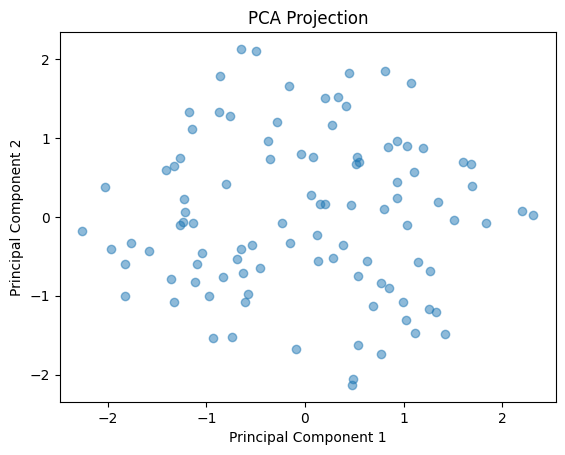

Manually computed transformed data (first 5 rows):
 [[-0.16185716  1.66174077]
 [ 0.53781479 -1.62222855]
 [-0.75788516  1.27333115]
 [-1.09573757 -0.59602144]
 [ 1.11946214 -1.47695038]]
Sklearn PCA transformed data (first 5 rows):
 [[-0.16185716  1.66174077]
 [ 0.53781479 -1.62222855]
 [-0.75788516  1.27333115]
 [-1.09573757 -0.59602144]
 [ 1.11946214 -1.47695038]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 samples, 3 features
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Step 1: Standardize the dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Project data onto top k principal components (k=2 for visualization)
k = 2
top_eigenvectors = eigenvectors[:, :k]
transformed_data = np.dot(standardized_data, top_eigenvectors)

# Visualizing the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

# Using scikit-learn's PCA for cross-check
sklearn_pca = PCA(n_components=2)
sklearn_transformed = sklearn_pca.fit_transform(standardized_data)

# Comparing results
print("Manually computed transformed data (first 5 rows):\n", transformed_data[:5])
print("Sklearn PCA transformed data (first 5 rows):\n", sklearn_transformed[:5])